<img src="Images/PU.png" width="100%">

### Course Name : ML 501 Practical Machine Learning  
#### Notebook compiled by : Rajiv Kale, Consultant at Learning and Development  
** Important ! ** For internal circulation only

## This notebook demonstrates how to handle dataset that contains more than one labels each containing two or more calsses

Credits to: https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/

# Iris Dataset 

Iris dataset is a typical machine learning classification problem. There are three species of Iris flower. When a new flower is given, we need to predict it belongs to which type. Following figure shows the samples of all three species  


<img src="Images/Iris_type.jpg" width="100%">

How to extract features from these flowers is a critical step. But, we don't have to do it by image processing. Some numeric measurements are given in ** Iris Datasets **

<img src="Images/Iris_measure.png" width="100%">

In [17]:
import pandas as pd
import numpy as np
from numpy import zeros

In [18]:
iris = pd.read_csv("./Datasets/IRIS.csv")
iris.head(10)

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


In [19]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
ID              150 non-null int64
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [20]:
iris["Species"].value_counts()

versicolor    50
setosa        50
virginica     50
Name: Species, dtype: int64

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
import seaborn as sns
sns.set(style="white", color_codes=True)

### Scatter Plot 

C:\Users\rajiv_kale\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


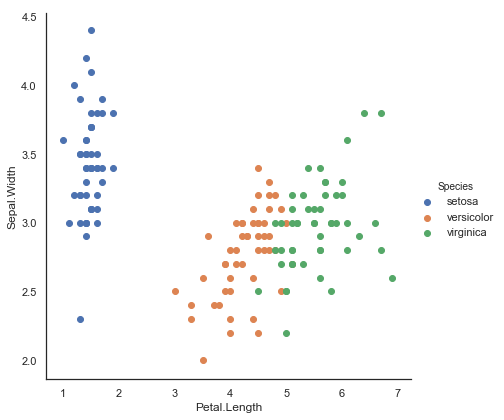

In [23]:
sns.FacetGrid(iris, hue="Species",size=6).map(plt.scatter, "Petal.Length", "Sepal.Width").add_legend()

In [24]:
len(iris)

150

In [25]:
iris[(iris['Petal.Length']<2.5) & (iris['Sepal.Width']>3.60) ].count()

ID              13
Sepal.Length    13
Sepal.Width     13
Petal.Length    13
Petal.Width     13
Species         13
dtype: int64

In [26]:
#iris['color'] = np.where(iris['Petal.Length']<2.5, 'pink', 'blue')

Let us add another column "color" that gives pink color to flowers of certain dimension and blue to the rest

In [27]:
iris['Color'] = np.where(   ((iris['Petal.Length']<2.5) & (iris['Sepal.Width']>3.6)) | ((iris['Petal.Length']>2.5) & (iris['Sepal.Width']>3.2)  ), 'pink', 'blue' )

C:\Users\rajiv_kale\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


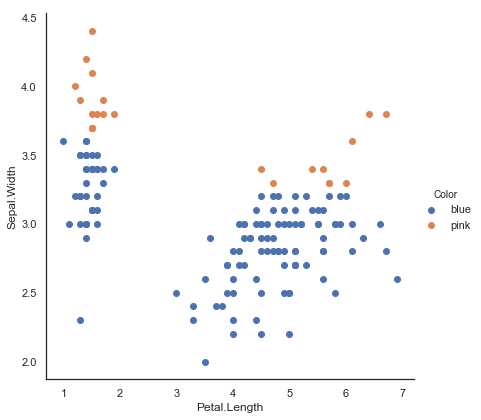

In [28]:
sns.FacetGrid(iris, hue="Color",size=6).map(plt.scatter, "Petal.Length", "Sepal.Width").add_legend()

In [29]:
iris.head(10)

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Color
0,1,5.1,3.5,1.4,0.2,setosa,blue
1,2,4.9,3.0,1.4,0.2,setosa,blue
2,3,4.7,3.2,1.3,0.2,setosa,blue
3,4,4.6,3.1,1.5,0.2,setosa,blue
4,5,5.0,3.6,1.4,0.2,setosa,blue
5,6,5.4,3.9,1.7,0.4,setosa,pink
6,7,4.6,3.4,1.4,0.3,setosa,blue
7,8,5.0,3.4,1.5,0.2,setosa,blue
8,9,4.4,2.9,1.4,0.2,setosa,blue
9,10,4.9,3.1,1.5,0.1,setosa,blue


In [30]:
iris.tail()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Color
145,146,6.7,3.0,5.2,2.3,virginica,blue
146,147,6.3,2.5,5.0,1.9,virginica,blue
147,148,6.5,3.0,5.2,2.0,virginica,blue
148,149,6.2,3.4,5.4,2.3,virginica,pink
149,150,5.9,3.0,5.1,1.8,virginica,blue


Now that we have two labels in dataset we will transform them to one-hot-encoded representation

In [31]:
labels1 = set()
labels2 = set()

In [32]:
for i in range(len(iris)):
    tags = iris['Species']
    labels1.update(tags)

In [33]:
for i in range(len(iris)):
    tags = iris['Color']
    labels2.update(tags)

In [34]:
labels1

{'setosa', 'versicolor', 'virginica'}

In [35]:
labels2

{'blue', 'pink'}

In [36]:
# convert set of labels to a list 
labels1 = list(labels1)
labels2 = list(labels2)
# order set alphabetically
labels1.sort()
labels2.sort()

In [37]:
labels1

['setosa', 'versicolor', 'virginica']

In [38]:
labels2

['blue', 'pink']

In [39]:
# Add onehot features for every label..  takes one lable from label_list, adds column and puts 1 or 0
for label in labels1:
    iris[label] = iris['Species'].apply(lambda x: 1 if label in x else 0)
for label in labels2:
    iris[label] = iris['Color'].apply(lambda x: 1 if label in x else 0)    

In [40]:
iris.head(60)

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Color,setosa,versicolor,virginica,blue,pink
0,1,5.1,3.5,1.4,0.2,setosa,blue,1,0,0,1,0
1,2,4.9,3.0,1.4,0.2,setosa,blue,1,0,0,1,0
2,3,4.7,3.2,1.3,0.2,setosa,blue,1,0,0,1,0
3,4,4.6,3.1,1.5,0.2,setosa,blue,1,0,0,1,0
4,5,5.0,3.6,1.4,0.2,setosa,blue,1,0,0,1,0
5,6,5.4,3.9,1.7,0.4,setosa,pink,1,0,0,0,1
6,7,4.6,3.4,1.4,0.3,setosa,blue,1,0,0,1,0
7,8,5.0,3.4,1.5,0.2,setosa,blue,1,0,0,1,0
8,9,4.4,2.9,1.4,0.2,setosa,blue,1,0,0,1,0
9,10,4.9,3.1,1.5,0.1,setosa,blue,1,0,0,1,0


#### Converting categorical varibales into numbers

### Preparing inputs and outputs 

In [41]:
X=iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']].values

In [42]:
y=iris[['setosa', 'versicolor', 'virginica', 'blue', 'pink']].values

In [43]:
len(X)

150

In [44]:
X.shape

(150, 4)

In [45]:
len(y)

150

In [46]:
y.shape

(150, 5)

In [29]:
# Philosophy : Create multi label dataset for demonstration
'''
from sklearn.datasets import make_multilabel_classification
# this will generate a random multi-label dataset
X1, y1 = make_multilabel_classification(sparse = True, n_labels = 20,
return_indicator = 'sparse', allow_unlabeled = False)
print(X1.shape)
print(y1.shape)
'''

"\nfrom sklearn.datasets import make_multilabel_classification\n# this will generate a random multi-label dataset\nX1, y1 = make_multilabel_classification(sparse = True, n_labels = 20,\nreturn_indicator = 'sparse', allow_unlabeled = False)\nprint(X1.shape)\nprint(y1.shape)\n"

### This is a multi-lable classification problem and can be handled in different ways
Check this link for details -
https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/    

##### Binary Relevance

 treats each label as a separate single class classification problem. Library provides this functionality.

<img src="Images/BinaryRelevance.png" width="80%">

In [30]:
#pip install scikit-multilearn
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

In [31]:
classifier_BinaryRelevance = BinaryRelevance(GaussianNB())

In [32]:
# train
classifier_BinaryRelevance.fit(X, y)

BinaryRelevance(classifier=GaussianNB(priors=None, var_smoothing=1e-09),
        require_dense=[True, True])

In [33]:
# predict
predictions_BinaryRelevance = classifier_BinaryRelevance.predict(X)

Now, in a multi-label classification problem, we can’t simply use our normal metrics to calculate the accuracy of our predictions. For that purpose, we will use **accuracy score** metric. This function calculates subset accuracy meaning the predicted set of labels should exactly match with the true set of labels.

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y,predictions_BinaryRelevance)

0.7933333333333333

##### using classifier chains

In this, the first classifier is trained just on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain. 

<img src="Images/ClassifierChain.png" width="80%">

In [35]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

In [36]:
# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier_ClassifierChain = ClassifierChain(GaussianNB())

In [37]:
# train
classifier_ClassifierChain.fit(X, y)

ClassifierChain(classifier=GaussianNB(priors=None, var_smoothing=1e-09),
        order=None, require_dense=[True, True])

In [38]:
# predict
predictions_ClassifierChain = classifier_ClassifierChain.predict(X)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y,predictions_ClassifierChain)

0.6466666666666666

##### Label Powerset

In this, we transform the problem into a multi-class problem with one multi-class classifier is trained on all unique label combinations found in the training data.

<img src="Images/PowerSet.png" width="80%">

Effectively what we are doing is creating additional label column that contains unique mapped label value for every possible combination of values in real labels

In above example for output labels (y1 to y4) there are 4 unique combinations. Bottom table shows single label dataset where output label shows four mapped values  

In [40]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

In [41]:
# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier_PowerSet = LabelPowerset(GaussianNB())

In [42]:
# train
classifier_PowerSet.fit(X, y)

LabelPowerset(classifier=GaussianNB(priors=None, var_smoothing=1e-09),
       require_dense=[True, True])

In [43]:
# predict
predictions_PowerSet = classifier_PowerSet.predict(X)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y,predictions_PowerSet)

0.94

##### Some experimentation below.. please ignore

##### The above approach is similar to converting numbers in y1 to y4 for every row into a single number and this can be implemnted in many way as shown here: https://www.geeksforgeeks.org/python-convert-a-list-of-multiple-integers-into-a-single-integer/

In [116]:
y

array([[1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0,

In [98]:
y.shape

(150, 5)

In [99]:
y.shape[1]

5

In [70]:
len(y)

150

In [71]:
y[0]

array([1, 0, 0, 1, 0], dtype=int64)

In [72]:
list_y = list(y[0])

In [73]:
list_y

[1, 0, 0, 1, 0]

In [108]:
# Python3 program to convert a list 
# of integers into a single integer 
def convert(list): 
      
    # Converting integer list to string list 
    s = [str(i) for i in list] 
      
    # Join list items using join() 
    res_string = "".join(s)
    #res_integer = format(int(res_string), '005d')
      
    return(res_string) 

In [109]:
new_y = convert(list_y)

In [110]:
type(new_y)

str

In [111]:
new_y

'00110'

In [ ]:
# Another method
'''
# Python3 program to convert a list 
# of integers into a single integer 
def convert(list): 
      
    # Converting integer list to string list 
    # and joining the list using join() 
    res = int("".join(map(str, list))) 
      
    return res 
'''    

In [114]:
new_list = []
for i in range(150):
    list_y = list(y[i])
    #print(list_y)
    y_row = convert(list_y)
    #print(type(y_row))
    new_list.append(y_row)

In [115]:
new_list

['10010',
 '10010',
 '10010',
 '10010',
 '10010',
 '10001',
 '10010',
 '10010',
 '10010',
 '10010',
 '10001',
 '10010',
 '10010',
 '10010',
 '10001',
 '10001',
 '10001',
 '10010',
 '10001',
 '10001',
 '10010',
 '10001',
 '10010',
 '10010',
 '10010',
 '10010',
 '10010',
 '10010',
 '10010',
 '10010',
 '10010',
 '10010',
 '10001',
 '10001',
 '10010',
 '10010',
 '10010',
 '10010',
 '10010',
 '10010',
 '10010',
 '10010',
 '10010',
 '10010',
 '10001',
 '10010',
 '10001',
 '10010',
 '10001',
 '10010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01001',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01001',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',
 '01010',


In [118]:
np.asarray(new_list)

array(['10010', '10010', '10010', '10010', '10010', '10001', '10010',
       '10010', '10010', '10010', '10001', '10010', '10010', '10010',
       '10001', '10001', '10001', '10010', '10001', '10001', '10010',
       '10001', '10010', '10010', '10010', '10010', '10010', '10010',
       '10010', '10010', '10010', '10010', '10001', '10001', '10010',
       '10010', '10010', '10010', '10010', '10010', '10010', '10010',
       '10010', '10010', '10001', '10010', '10001', '10010', '10001',
       '10010', '01010', '01010', '01010', '01010', '01010', '01010',
       '01001', '01010', '01010', '01010', '01010', '01010', '01010',
       '01010', '01010', '01010', '01010', '01010', '01010', '01010',
       '01010', '01010', '01010', '01010', '01010', '01010', '01010',
       '01010', '01010', '01010', '01010', '01010', '01010', '01010',
       '01010', '01001', '01010', '01010', '01010', '01010', '01010',
       '01010', '01010', '01010', '01010', '01010', '01010', '01010',
       '01010', '010

In [119]:
y.shape

(150, 5)

##### Adapted Multi-Label Classifier

Instead of transforming multi-label dataset into many single label datasets here we adapt the algorithm itself to handle multi-label dataset 

multi-label version of kNN is represented by MLkNN

In [45]:
from skmultilearn.adapt import MLkNN

classifier_MLkNN = MLkNN(k=20)

In [46]:
# train
classifier_MLkNN.fit(X, y)

MLkNN(ignore_first_neighbours=0, k=20, s=1.0)

In [47]:
# predict
predictions_MLkNN = classifier_MLkNN.predict(X)

In [48]:
accuracy_score(y,predictions_MLkNN)

0.92

###### We can't use simple Logistic Regression as below

# Logistic Regression 

In [49]:
y.shape

(150, 5)

In [54]:
len(y)

150

In [57]:
y[0]

array([1, 0, 0, 1, 0], dtype=int64)

In [62]:
list_y = list(y[0])

In [63]:
list_y

[1, 0, 0, 1, 0]

In [66]:
s = "-"

In [68]:
s = s.join(list_y)

TypeError: sequence item 0: expected str instance, numpy.int64 found

In [53]:
y[0][0]

1

In [56]:
for i in range(3):
    for j in range(5):
        print(y[i][j])

1
0
0
1
0
1
0
0
1
0
1
0
0
1
0


In [229]:
from sklearn.linear_model import LogisticRegression

In [230]:
model = LogisticRegression()

In [231]:
model.fit(X, y)

C:\Users\rajiv_kale\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: bad input shape (150, 5)

In [172]:
model.fit(X, y.ravel())

C:\Users\rajiv_kale\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Found input variables with inconsistent numbers of samples: [150, 750]

### Accuracy 

In [ ]:
model.score(X,y)

#### Make Predictions

In [ ]:
expected = y
predicted = model.predict(X)

#### summarize the fit of the model

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(expected, predicted))

In [ ]:
print(metrics.confusion_matrix(expected, predicted))

## Regularization

In [ ]:
model = LogisticRegression(C=10000,penalty='l2' )

In [ ]:
y.flatten()

In [ ]:
#model(X,y)
model.fit(X,y.flatten())

In [ ]:
model.score(X,y)

# Effect of Regularization on classification boundary 

In [ ]:
from sklearn import linear_model, datasets
import numpy as np

In [ ]:
def Regularization_Logistic(Regu,type):

    # import some data to play with
    iris = datasets.load_iris()
    X = iris.data[:,:2]  # we only take the first two features.
    Y = iris.target

    h = .02  # step size in the mesh

    logreg = linear_model.LogisticRegression(C=Regu,penalty=type)

    # we create an instance of Neighbours Classifier and fit the data.
    logreg.fit(X, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

    expected = Y
    predicted = logreg.predict(X)
    # summarize the fit of the model
    print(metrics.classification_report(expected, predicted))
    print(metrics.confusion_matrix(expected, predicted))


In [ ]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display
#i = interact(Regularization_Logistic, Regu=(1,10000),type=('l1','l2'))
i = interact(Regularization_Logistic, Regu=(1,10000), type={'l1','l2'})